In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family = 'AppleGothic')

#(-)숫자 표시하기
plt.rcParams['axes.unicode_minus'] = False

#그래프 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/d8/w7xv85nx7rz8bhk14mgwb7wm0000gn/T/ipykernel_17712/687947504.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# 데이터 불러오기

In [3]:
df1 = pd.read_csv('chapter2_data.csv')
df1.head()

,id,유형,경로,날짜,결제유형,제품명,계약금액,상태,연체,연체기록,연결계좌,해약여부,나이,마일리지
0,66292722,렌탈,서비스 방문,2019-12-24,CMS,A,96900,계약확정,1,있음,신한은행,정상,64.0,2386.0
1,66784411,렌탈,홈쇼핑/방송,2019-12-24,카드이체,A,81900,계약확정,0,없음,외환카드,정상,38.0,1487.0
2,66766058,렌탈,일반,2019-11-07,CMS,C,102900,계약확정,0,없음,국민은행,정상,27.0,1342.0
3,66775111,렌탈,홈쇼핑/방송,2019-12-01,카드이체,A,96900,계약확정,0,없음,롯데카드,정상,24.0,1212.0
4,66784935,렌탈,서비스 방문,2019-12-26,CMS,A,105900,계약확정,0,없음,국민은행,정상,51.0,2124.0


# 데이터 파악하기

- 데이터타입: 숫자형, 범주형?
- null이 있는지?

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28555 entries, 0 to 28554
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28555 non-null  int64  
 1   유형      28555 non-null  object 
 2   경로      28555 non-null  object 
 3   날짜      28555 non-null  object 
 4   결제유형    28555 non-null  object 
 5   제품명     28555 non-null  object 
 6   계약금액    28555 non-null  int64  
 7   상태      28555 non-null  object 
 8   연체      28555 non-null  int64  
 9   연체기록    28555 non-null  object 
 10  연결계좌    28555 non-null  object 
 11  해약여부    28555 non-null  object 
 12  나이      28555 non-null  float64
 13  마일리지    28555 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.1+ MB


In [6]:
# 연속형데이터만 뽑아서 통계량을 보여줌.
df1.describe()

,id,계약금액,연체,나이,마일리지
count,2.855500e+04,28555.000000,28555.000000,28555.000000,28555.000000
mean,6.664544e+07,94956.571529,0.151042,46.583225,1967.358221
std,9.879706e+05,12591.330111,1.110066,13.397094,434.926055
min,2.573206e+07,55200.000000,0.000000,20.000000,877.000000
25%,6.665981e+07,87900.000000,0.000000,37.000000,1646.000000
50%,6.676788e+07,96900.000000,0.000000,46.000000,1947.000000
75%,6.678124e+07,98400.000000,0.000000,56.000000,2264.000000
max,6.696986e+07,215700.000000,15.000000,90.000000,3485.000000


In [7]:
# 범주형데이터에 대한 정보를 보여줌.
# unique: 카테고리 개수
# 가장 데이터가 많은 카테고리
# freq: 
df1.describe(include = 'object')

,유형,경로,날짜,결제유형,제품명,상태,연체기록,연결계좌,해약여부
count,28555,28555,28555,28555,28555,28555,28555,28555,28555
unique,2,18,101,2,6,4,2,42,2
top,렌탈,서비스 방문,2019-10-25,CMS,A,계약확정,없음,롯데카드,정상
freq,27128,8836,494,18557,21262,28047,27505,6142,28074


# 시각화

## 1. 단일변수 분석하기

### 1) 연속형데이터: histogram 사용
> 단일변수, 연속형일 때 사용 <br>
> 분포를 보기 위해서 사용함 : 결측치나 이상값이 있는지 확인 <br>
> 구간의 개수 조절이 가능하다<br>
> 품질관리도구 7개중 하나 (제조업)<br>
> 다양한 패턴 확인<br>


그리는 방법
> 각 구간별 데이터의 개수를 센다.<br>
> 각 구간별 데이터의 개수만큼 위로 쌓아 올린다.

### 옵션: bins, kde, rug + [hue]

In [8]:
df1.describe()

,id,계약금액,연체,나이,마일리지
count,2.855500e+04,28555.000000,28555.000000,28555.000000,28555.000000
mean,6.664544e+07,94956.571529,0.151042,46.583225,1967.358221
std,9.879706e+05,12591.330111,1.110066,13.397094,434.926055
min,2.573206e+07,55200.000000,0.000000,20.000000,877.000000
25%,6.665981e+07,87900.000000,0.000000,37.000000,1646.000000
50%,6.676788e+07,96900.000000,0.000000,46.000000,1947.000000
75%,6.678124e+07,98400.000000,0.000000,56.000000,2264.000000
max,6.696986e+07,215700.000000,15.000000,90.000000,3485.000000


### bins

- bins : 데이터의 구간을 몇개로 끊어서 볼 것인가?
- 도메인에 따라서 끊어가는 구간이 다를 수 있고, 분석가의 역량이 여기에 달림 (얼마나 끊어가느냐에 따라 얻을 수 있는 인사이트가 다르므로)

<AxesSubplot:xlabel='계약금액', ylabel='Count'>

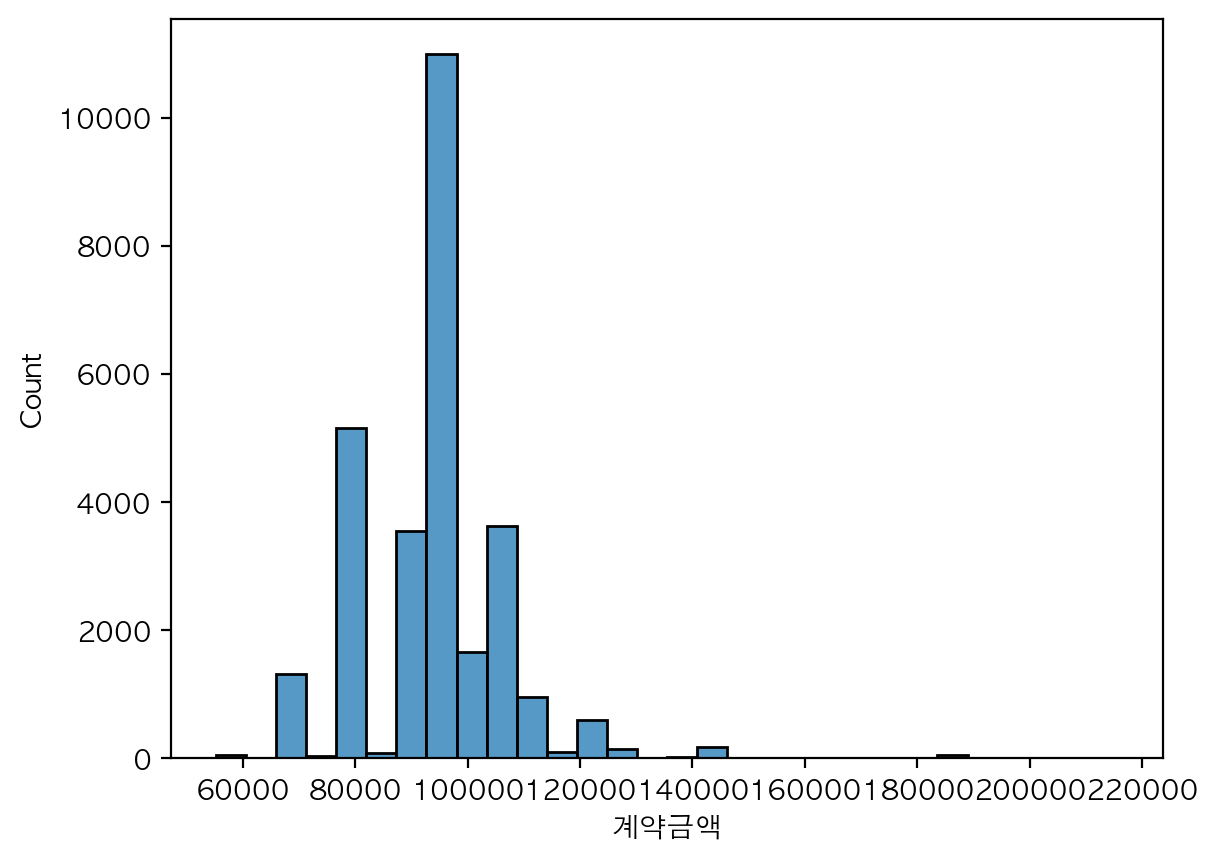

In [11]:
sns.histplot(data=df1, x='계약금액', bins= 30)

<AxesSubplot:xlabel='계약금액', ylabel='Count'>

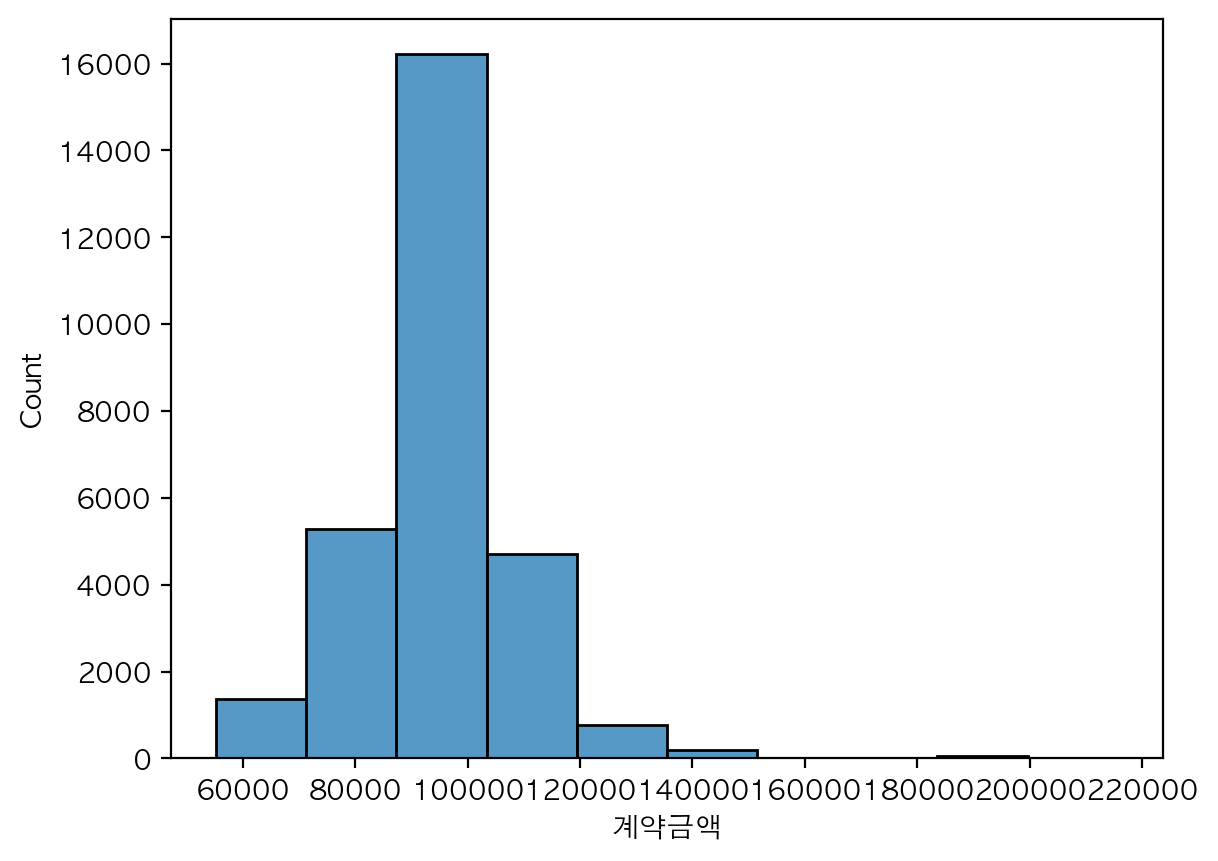

In [12]:
sns.histplot(data=df1, x='계약금액', bins= 10)

- bins를 적게 가져가면 트렌트 보기에 좋지만, 30일 때와 비교했을 때 30에는 중간에 끊어지는 부분이 있으므로 이 부분에서도 인사이트를 얻을 수 있다.

### kde : 확률밀도함수
- 히스토그램을 그래프 형태로 표현해 준다.

<AxesSubplot:xlabel='계약금액', ylabel='Count'>

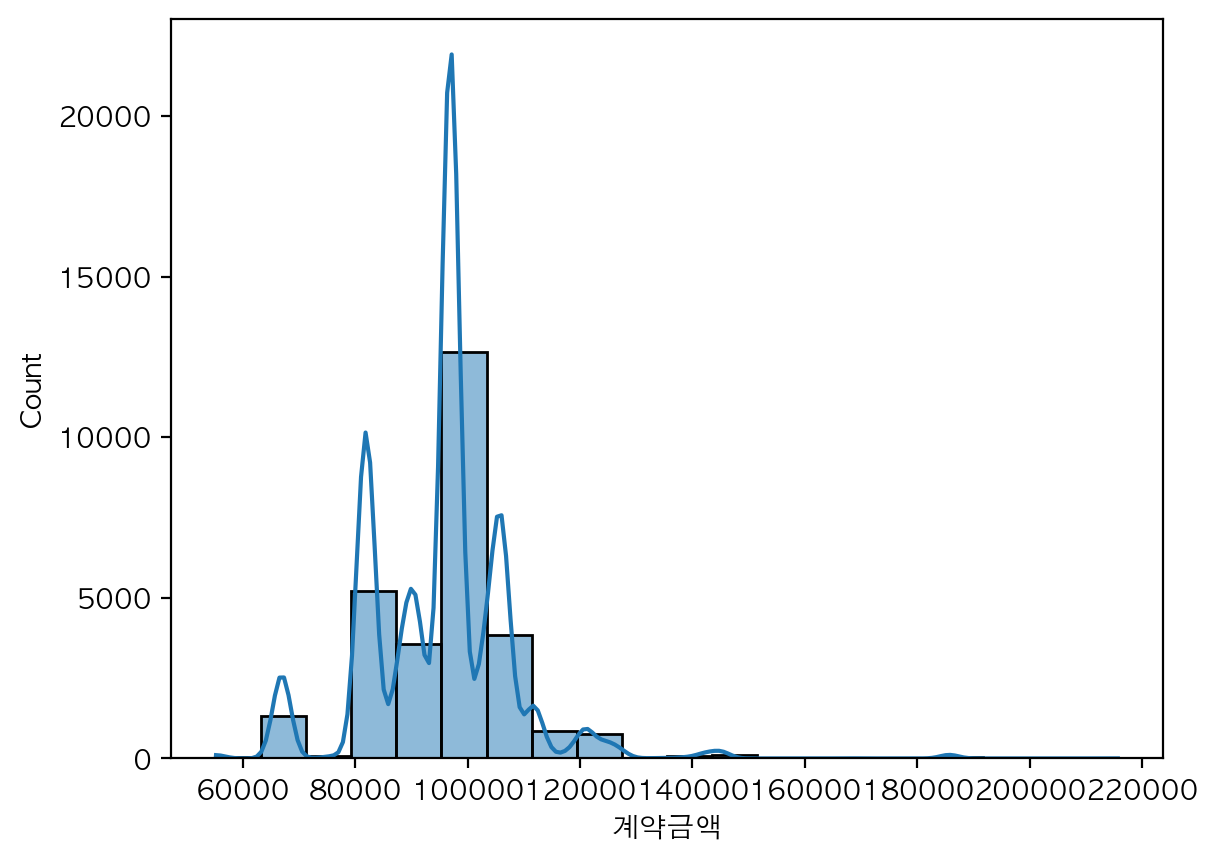

In [14]:
sns.histplot(data=df1, x='계약금액', bins= 20, kde=True)

### rug
- 위 그래프를 보명 140,000원 이상에도 금액이 있지만, 전체 비율 대비 값이 적어서 마치 없는 것 처럼 보인다.
- 하지만 이 구간에서도 유의미한 분석을 이끌어 낼 수 있기 때문에, 값이 있는지 없는지를 확인하기 위해 사용한다. (rug는 histplot에는 없어서, 비슷한 displot을 사용함)
- 뭔가 rug깔린 것 같아서 rug 인가

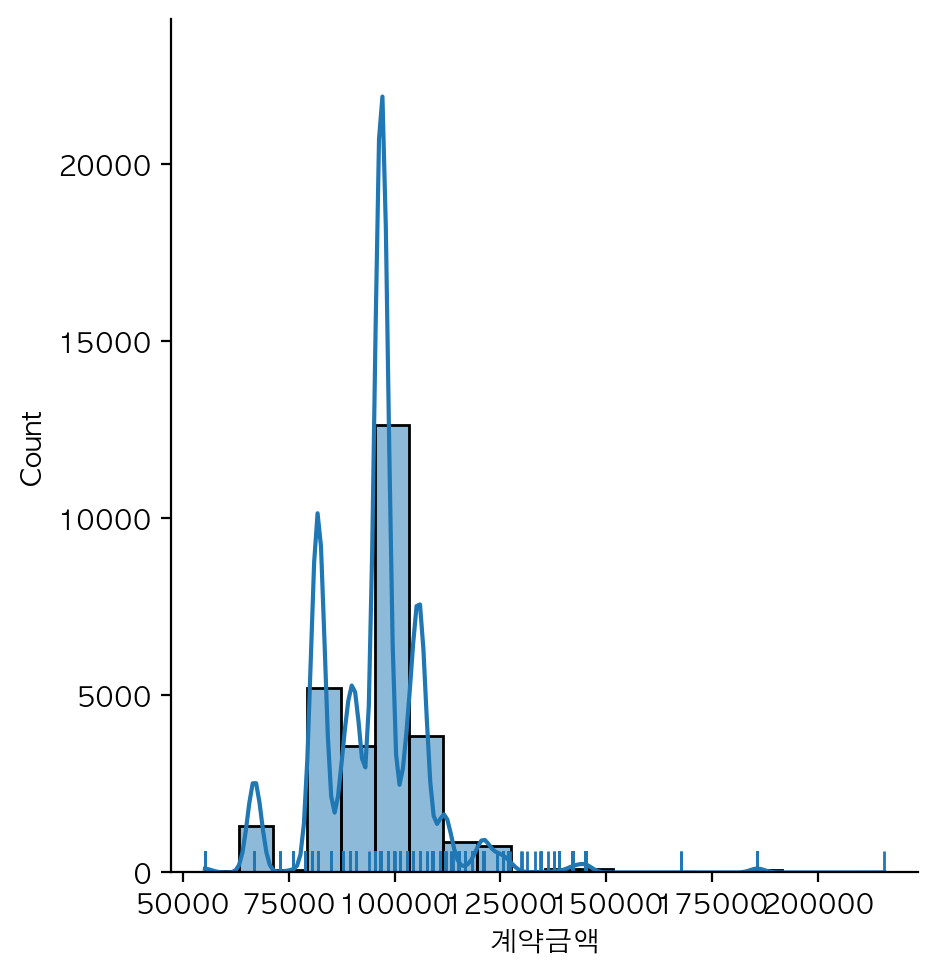

In [15]:
sns.displot(data=df1, x='계약금액', bins= 20, kde=True, rug=True)

### hue
- hue에는 범주형 데이터가 들어간다.

<AxesSubplot:xlabel='계약금액', ylabel='Count'>

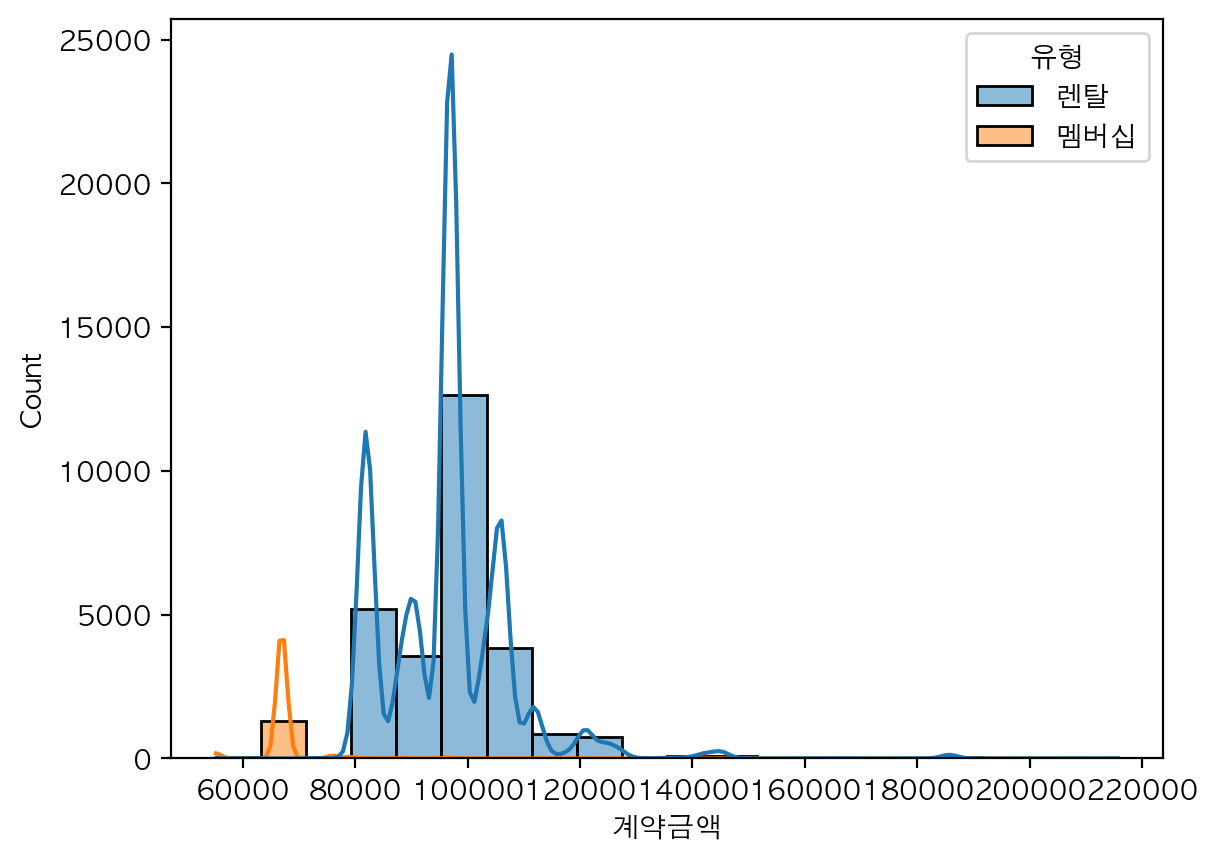

In [26]:
sns.histplot(data=df1, x='계약금액', bins= 20, kde=True, hue='유형')

# 분석실습

## Q. 고객들의 계약 금액 분포는 어떤가요?

<AxesSubplot:xlabel='계약금액', ylabel='Count'>

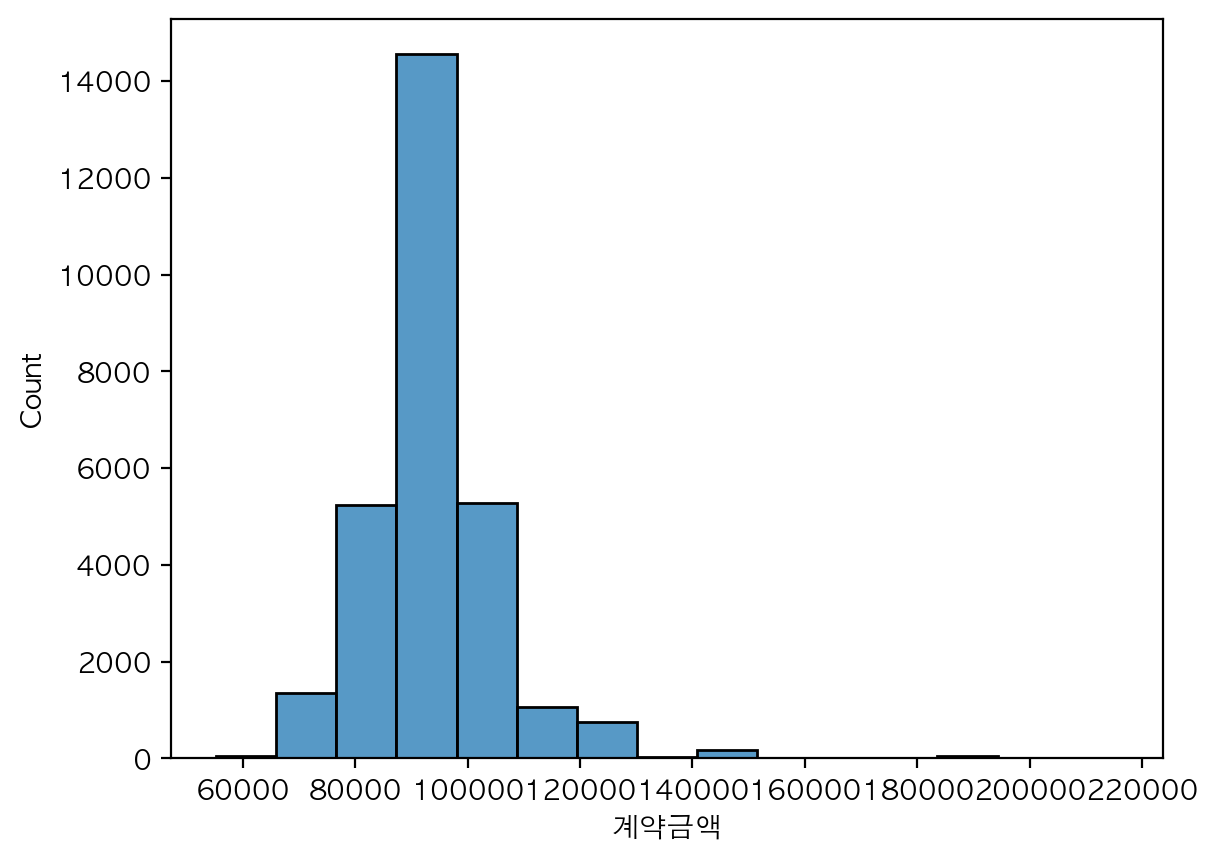

In [24]:
sns.histplot(data=df1, x='계약금액', bins=15)

거의 9만원대에서 계약을 많이 진행하는 것을 확인할 수 있다. <br>
(bins 범위를 바꿔가면서 확인해본다.)

## Q. 지불 과정에서 연체를 많이 하는 편인가요?

<AxesSubplot:xlabel='연체', ylabel='Count'>

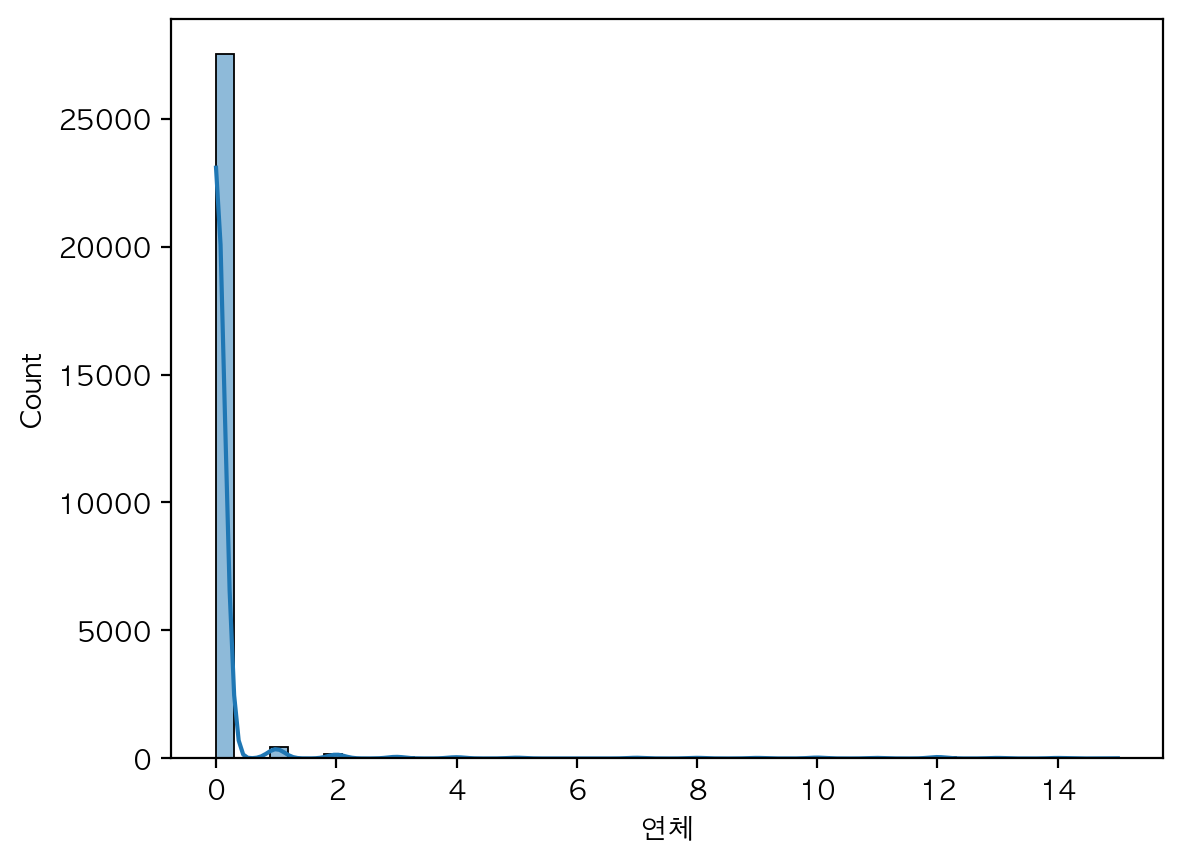

In [32]:
sns.histplot(data=df1, x='연체', bins = 50, kde=True)

In [36]:
df1['연체'].value_counts().reset_index().sort_values(by='index')

,index,연체
0,0,27505
1,1,434
2,2,177
3,3,74
5,4,57
7,5,35
15,6,3
8,7,32
9,8,28
11,9,25


비율로 따졌을 때에는 0에 분포를 많이 하기 때문에 많지 않다고 할 수도 있지만, <br>
절대값으로 봤을 땐 연체를 한 사람들이 꽤 있기 때문에 많다고 할 수도 있다. (산업 특성에 따라 달라짐)

## Q. 고객들의 연령대는 주로 어느정도 인가요?

<AxesSubplot:xlabel='나이', ylabel='Count'>

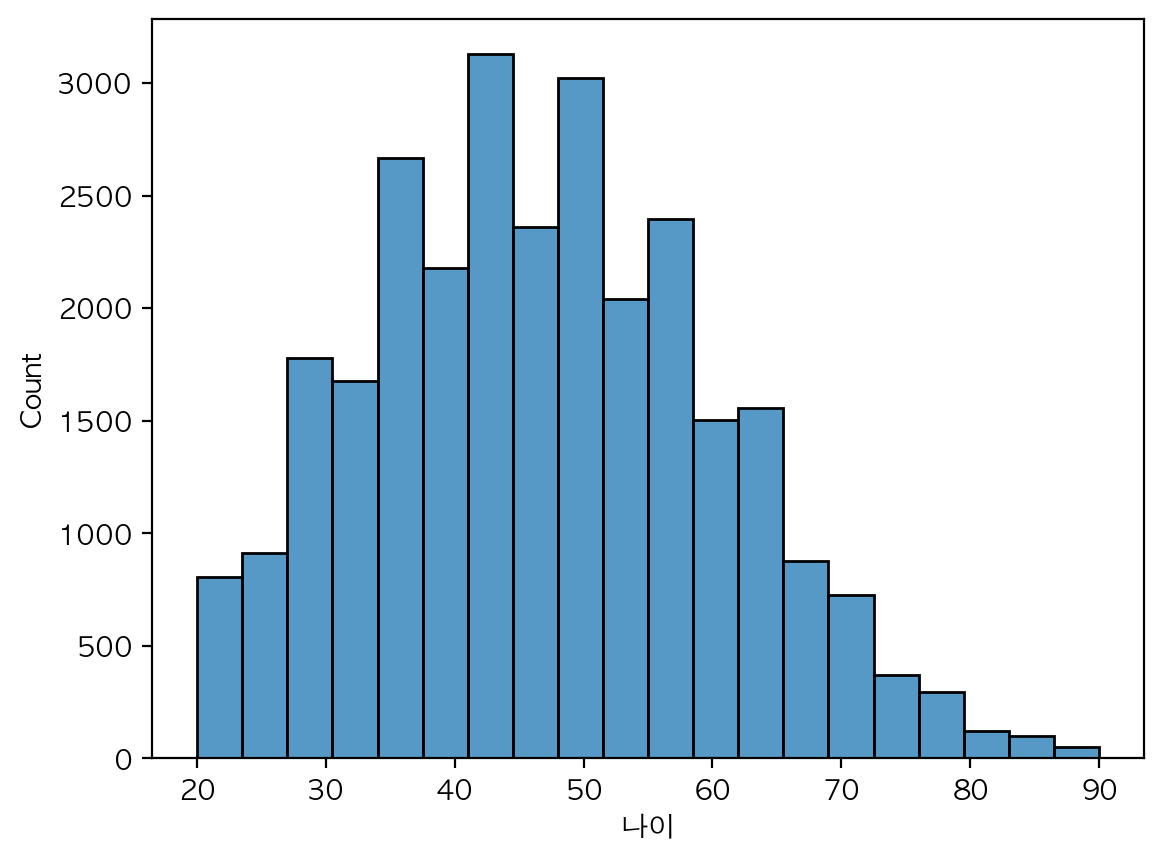

In [42]:
sns.histplot(data=df1, x='나이', bins=20)

주로 30대 중반 ~ 50대 중반까지

## Q. 연령대에 따라 선호하는 계약 유형이 다를까요?
계약유형, 연령대

<AxesSubplot:xlabel='나이', ylabel='Count'>

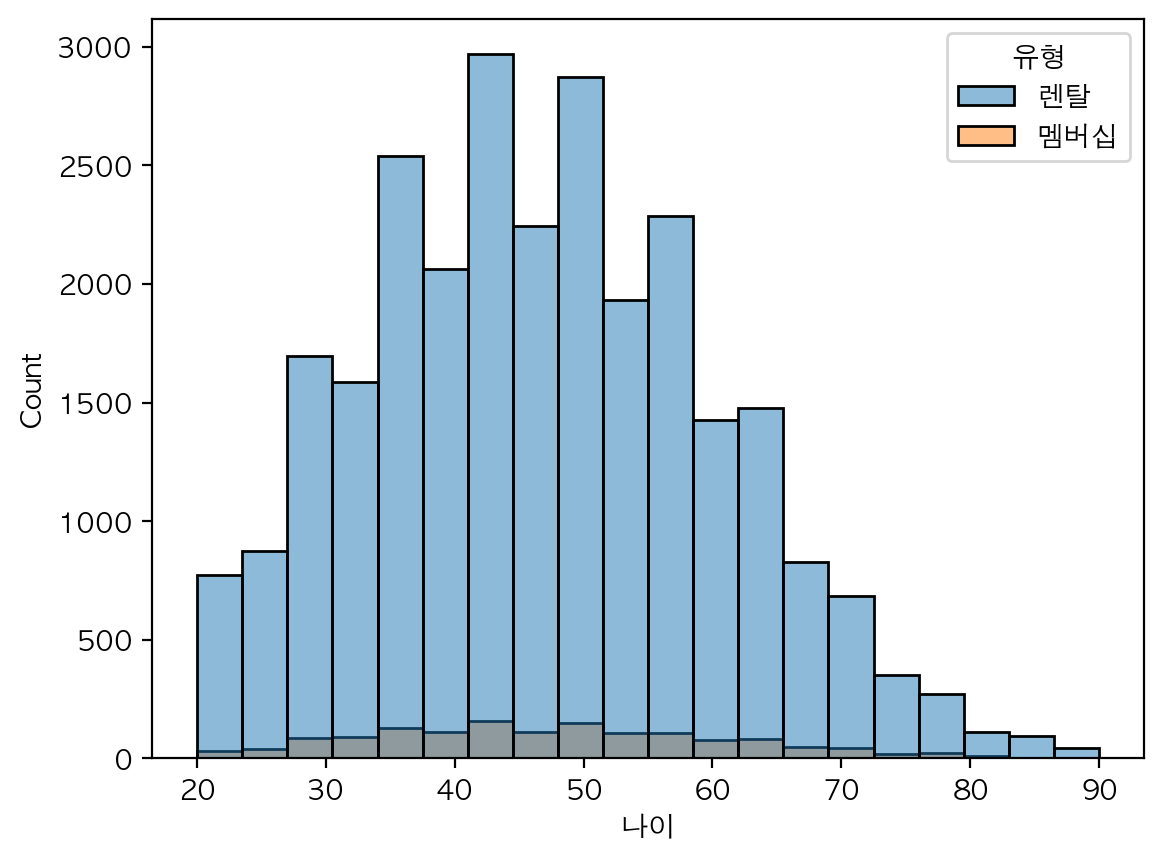

In [46]:
sns.histplot(data=df1, x='나이', bins=20, hue='유형')

<AxesSubplot:xlabel='나이', ylabel='Density'>

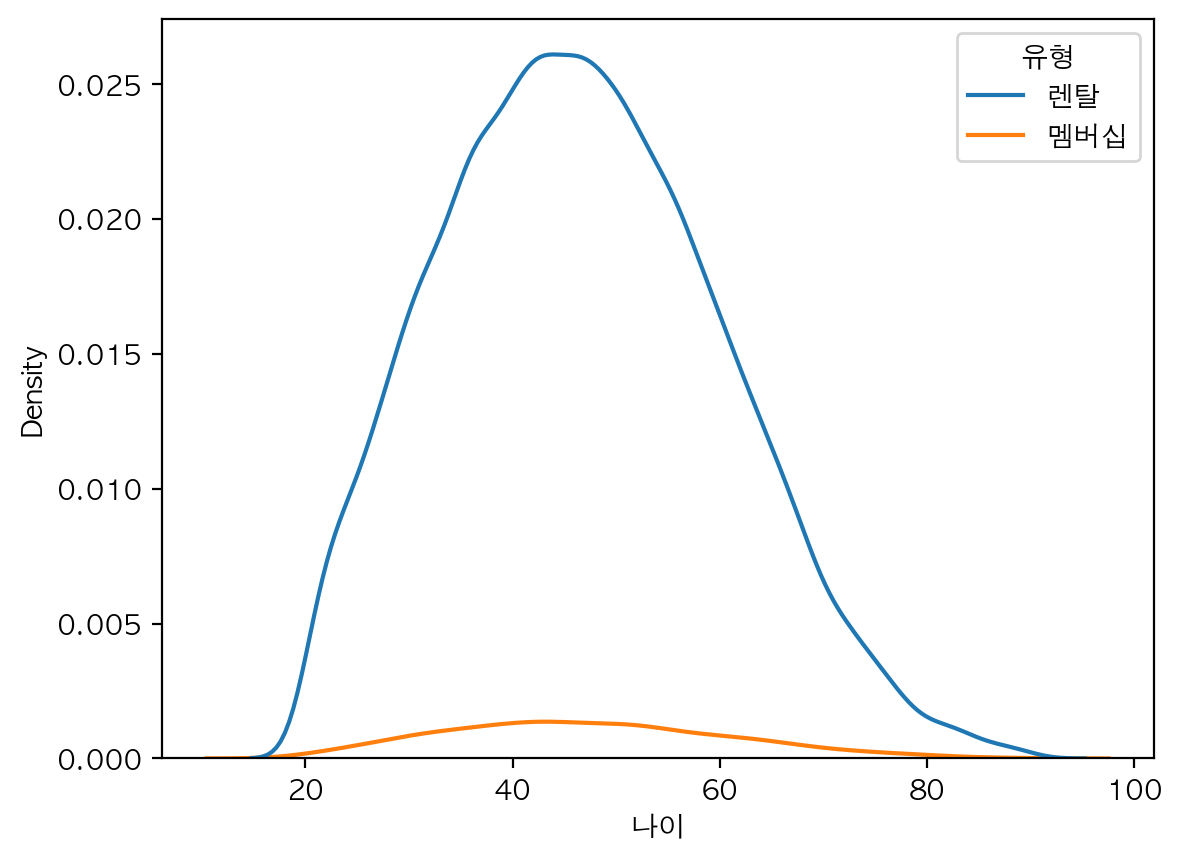

In [47]:
sns.kdeplot(data=df1, x='나이', hue='유형')

이런경우에는 kde로 보는게 좋다. 두개의 유형이 나이에 따라 달라지는 것 같아 보이지는 않는다.

## Q. 계약 금액에 따라 계약 유형이 다를까요?

<AxesSubplot:xlabel='계약금액', ylabel='Count'>

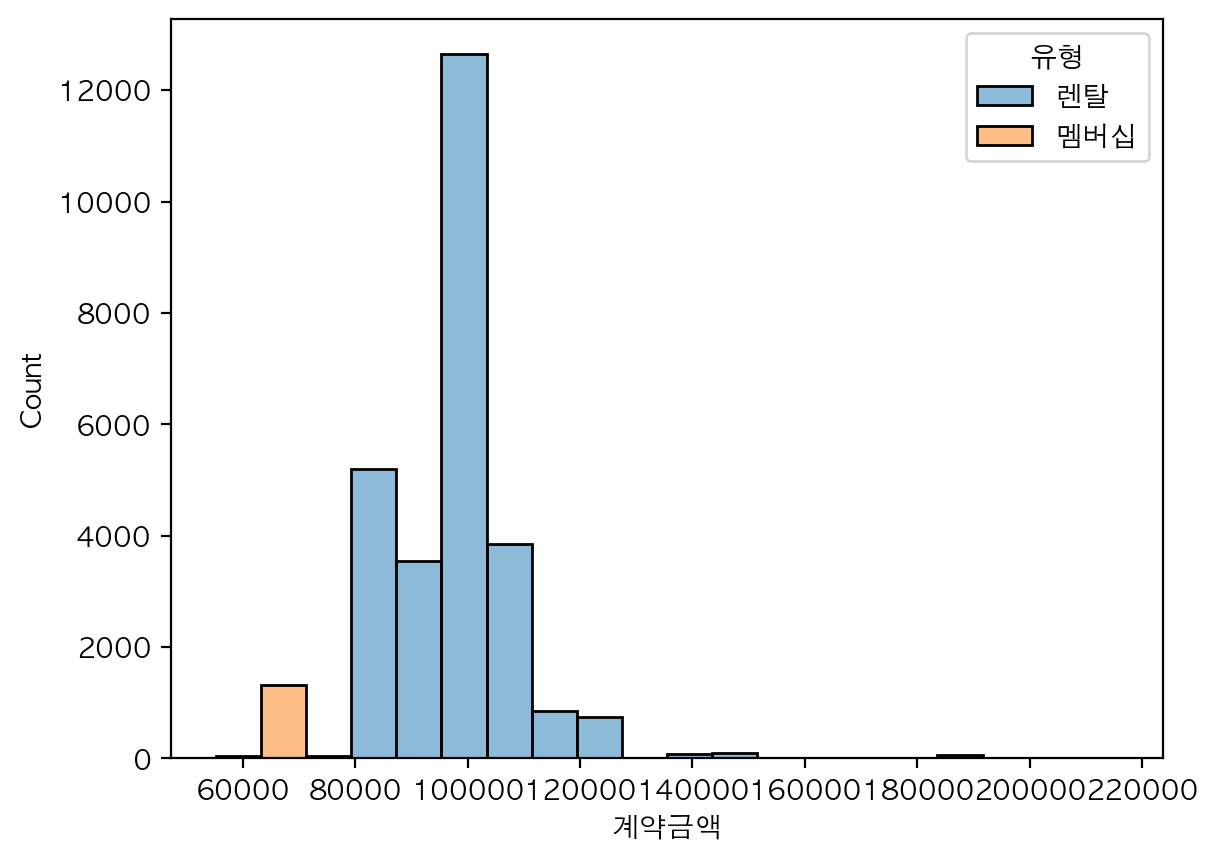

In [48]:
sns.histplot(data=df1, x='계약금액', bins=20, hue='유형')

<AxesSubplot:xlabel='계약금액', ylabel='Density'>

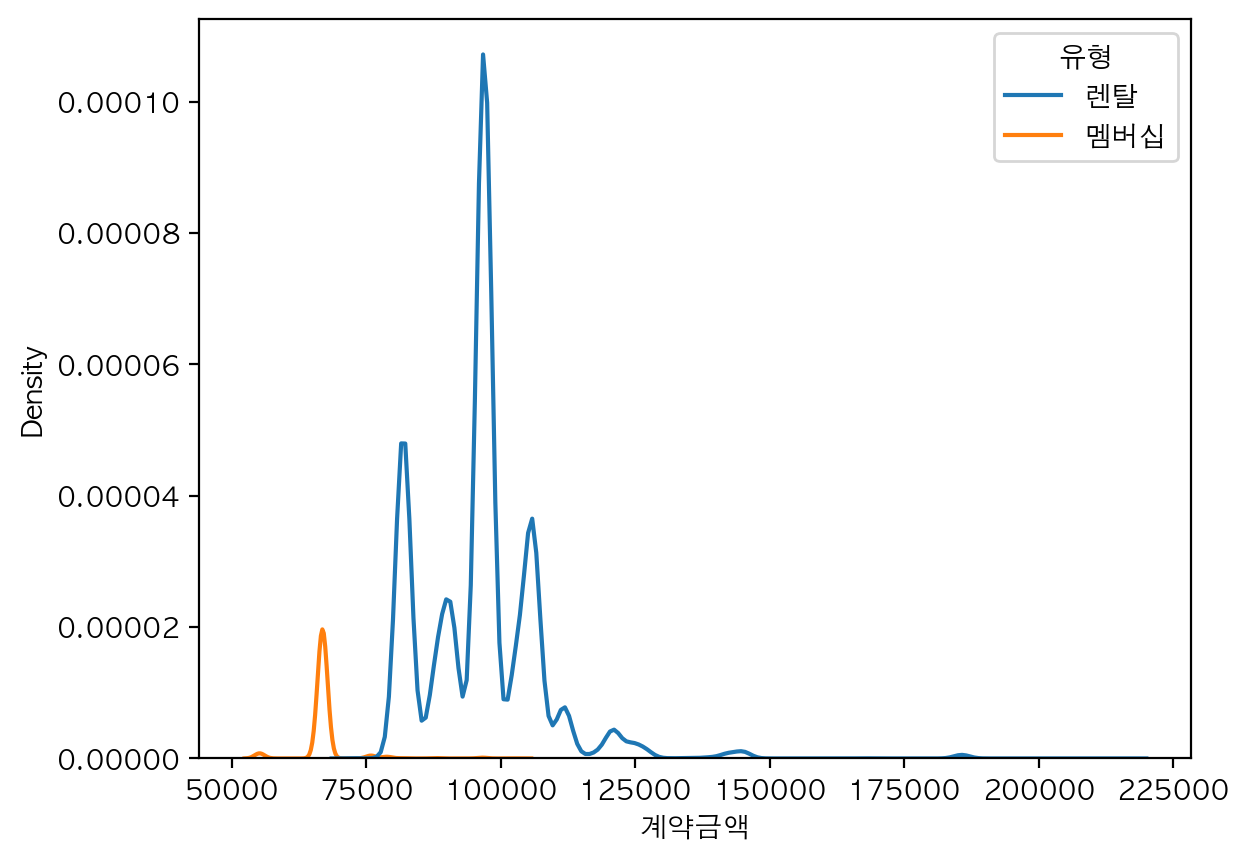

In [51]:
sns.kdeplot(data=df1, x='계약금액', hue='유형')

(0.0, 5e-06)

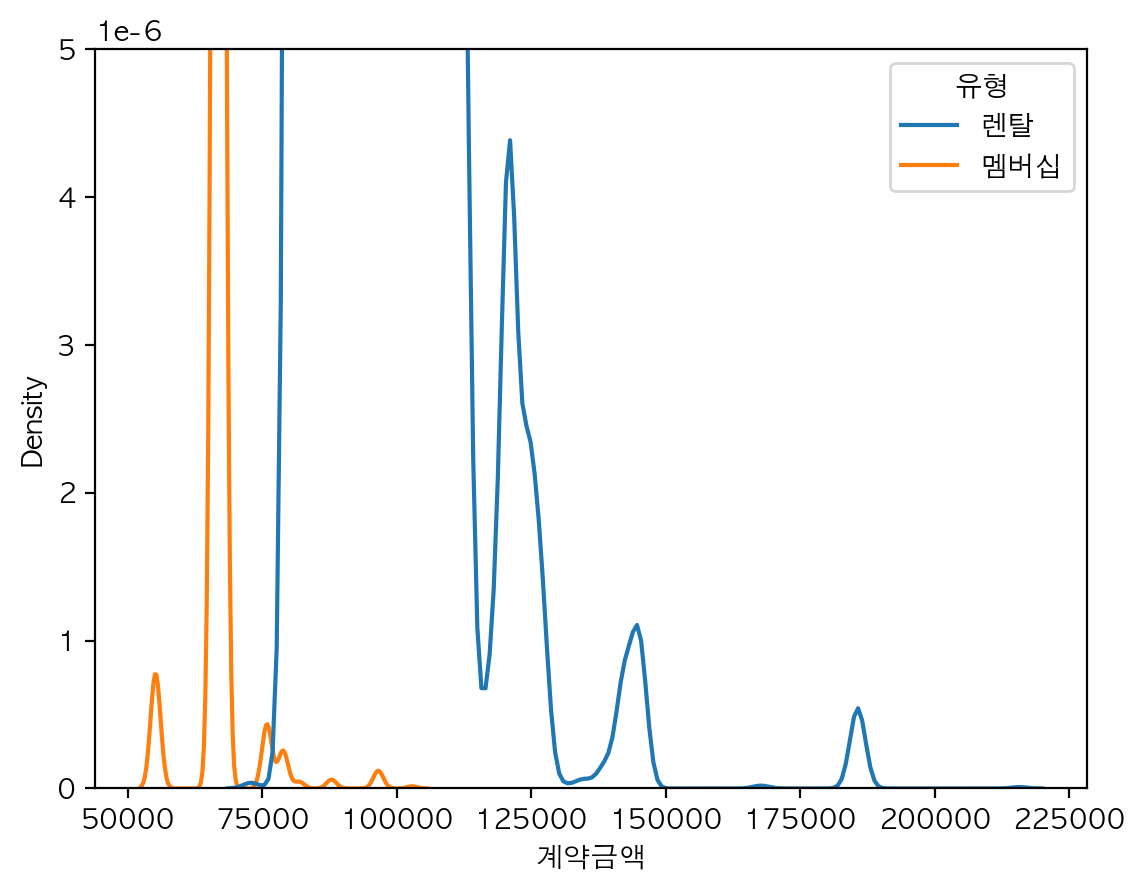

In [52]:
sns.kdeplot(data=df1, x='계약금액', hue='유형')

#y축을 원하는 배율로 확대
plt.ylim(0,0.000005)

특정 계약금액이 유형을 결정하는 것은 아니지만, 계약금액대에 따라서 유형의 분포가 달라진다라고 볼 수는 있다.

## Q. 제품에 따라 계약 금액이 다를까요?

<AxesSubplot:xlabel='계약금액', ylabel='Density'>

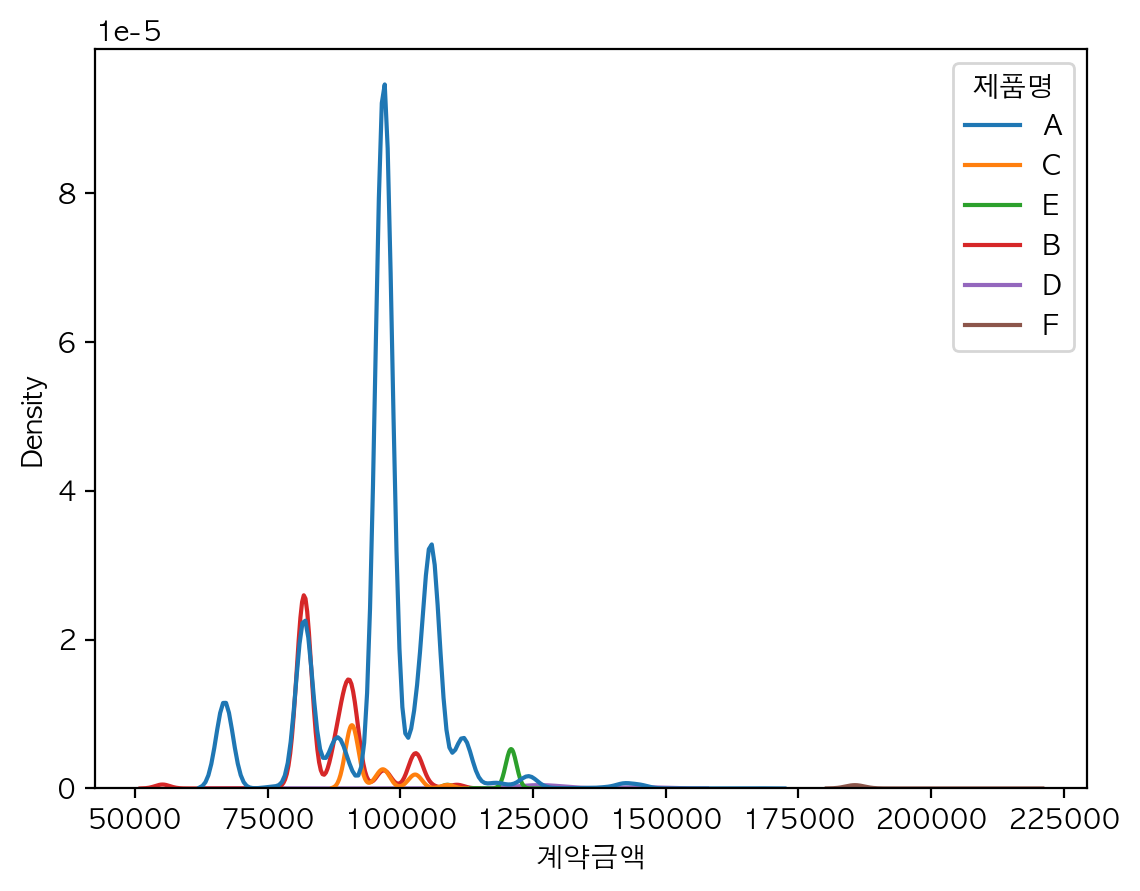

In [60]:
sns.kdeplot(data=df1, x='계약금액', hue='제품명')

(0.0, 5e-06)

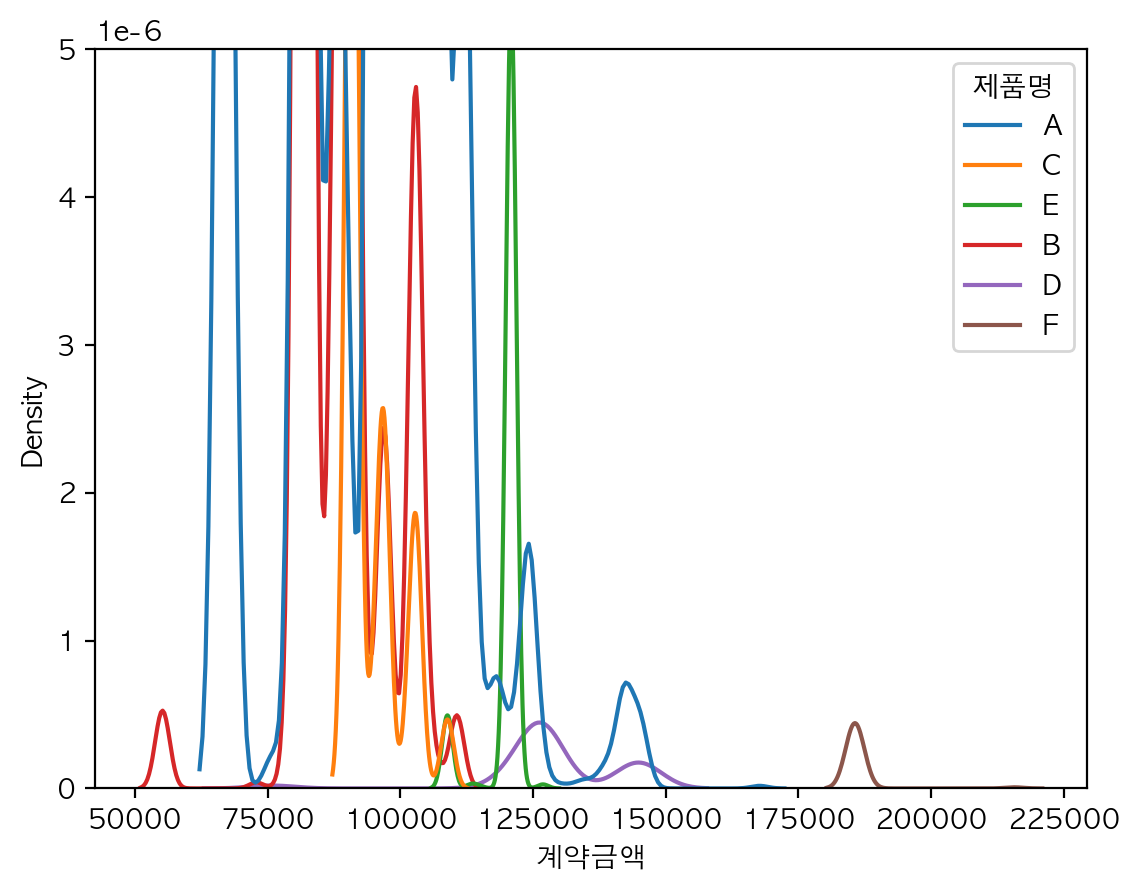

In [61]:
sns.kdeplot(data=df1, x='계약금액', hue='제품명')
plt.ylim(0, 0.000005)

## Q. 계약 경로와 나이가 서로 관계가 있을까요?

<AxesSubplot:xlabel='나이', ylabel='Density'>

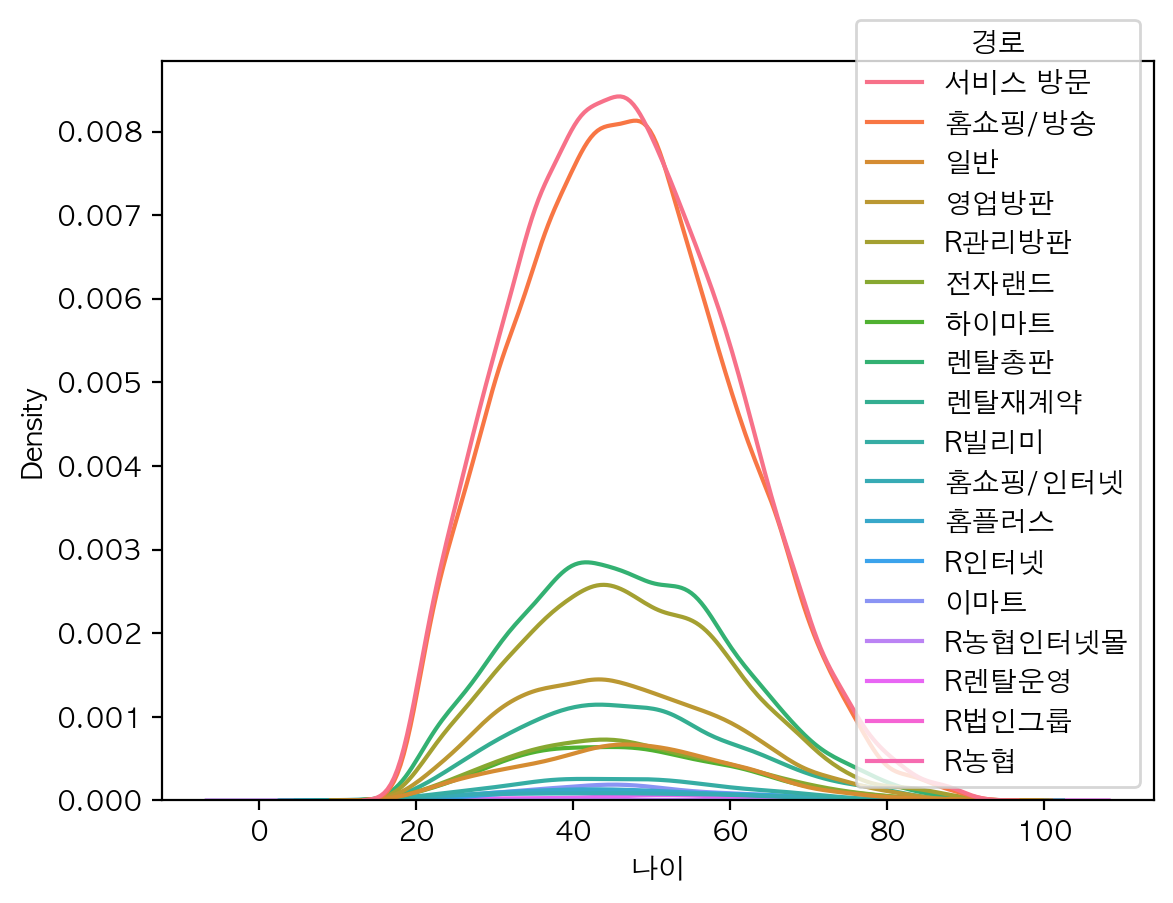

In [62]:
sns.kdeplot(data=df1, x='나이', hue='경로')

계약 경로와 나이와는 크게 상관관계가 없어 보인다.